# Cluster analysis (Grupowanie)

>[ANG] 
**Task 1** Perform clustering of the data set `iris` using the agglomerative method. Estimate the optimum number of groups and the best type of distance by analysing the data obtained (e.g. dendrogram). 

>[POL]
**Zadanie 1** Wykonaj grupowanie danych zbioru `iris` metodą aglomeracyjną. Oszacuj na podstawie analizy otrzymanych danych (m.in. dendrogramu) jakia jest optymalna liczba grup i najlepszy typ odległości.

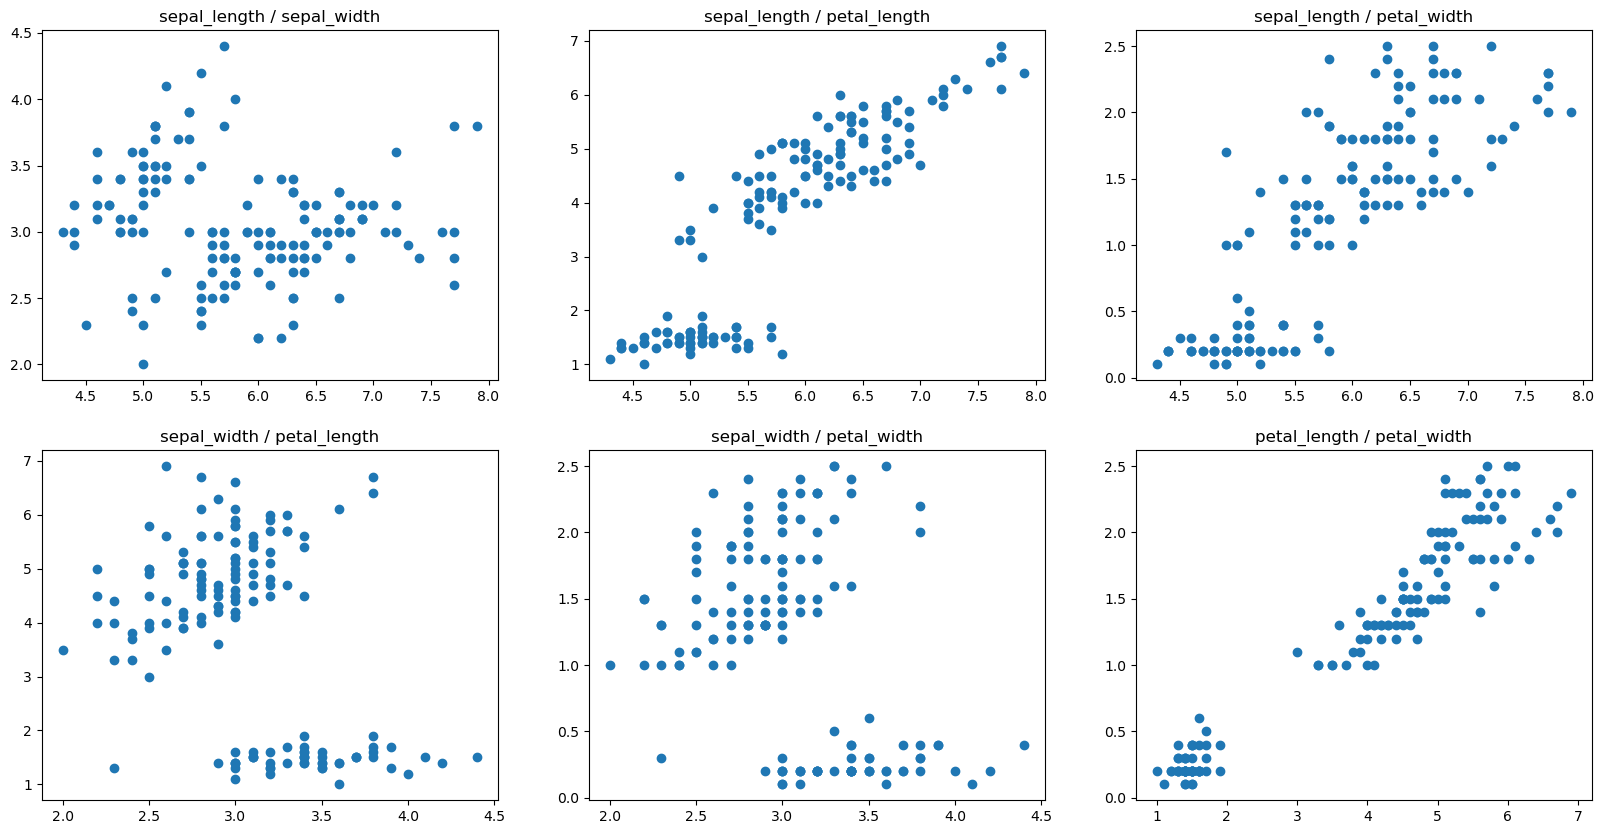

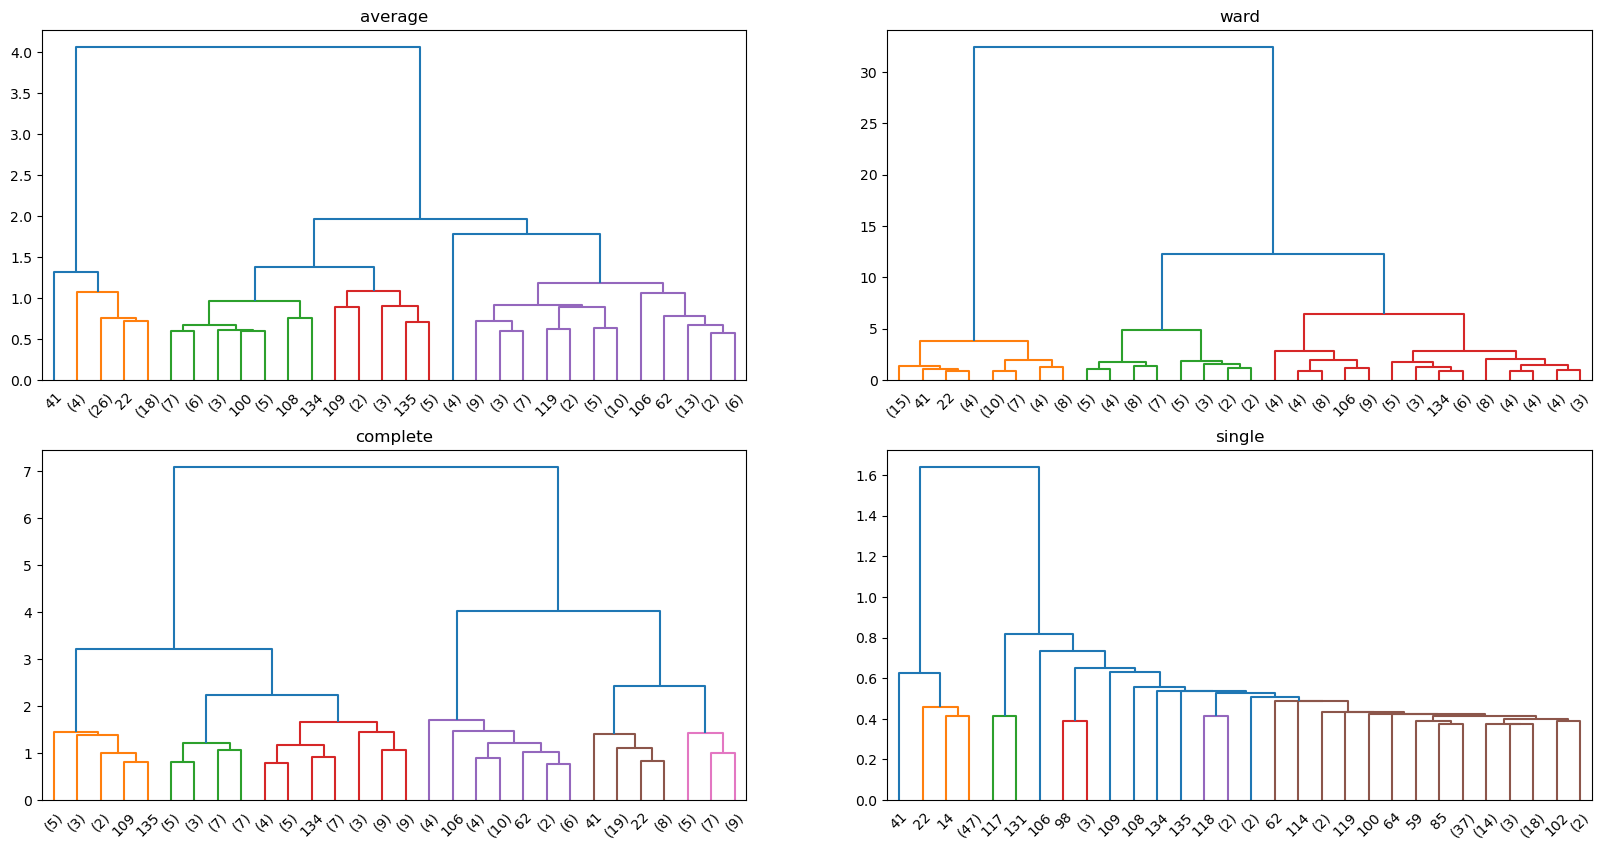

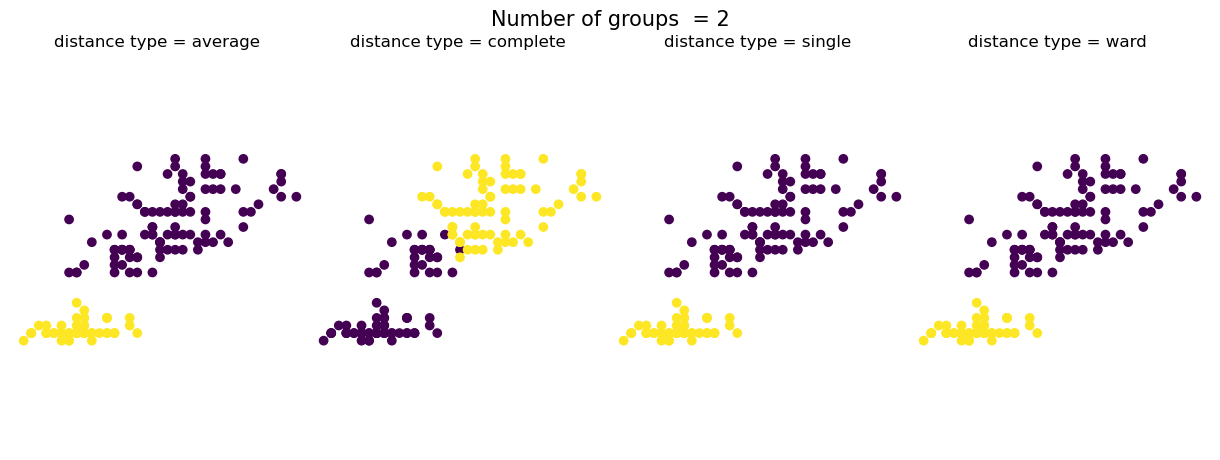

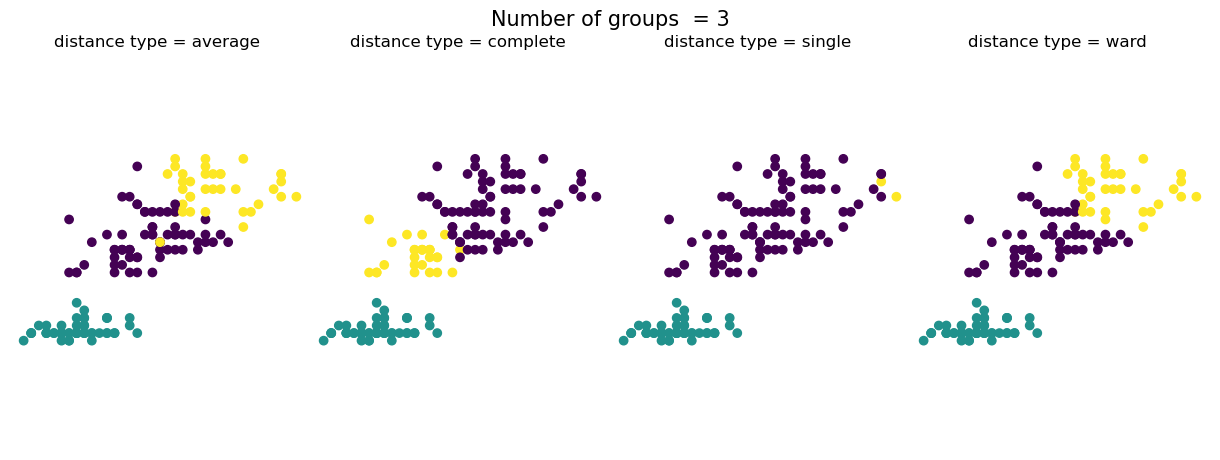

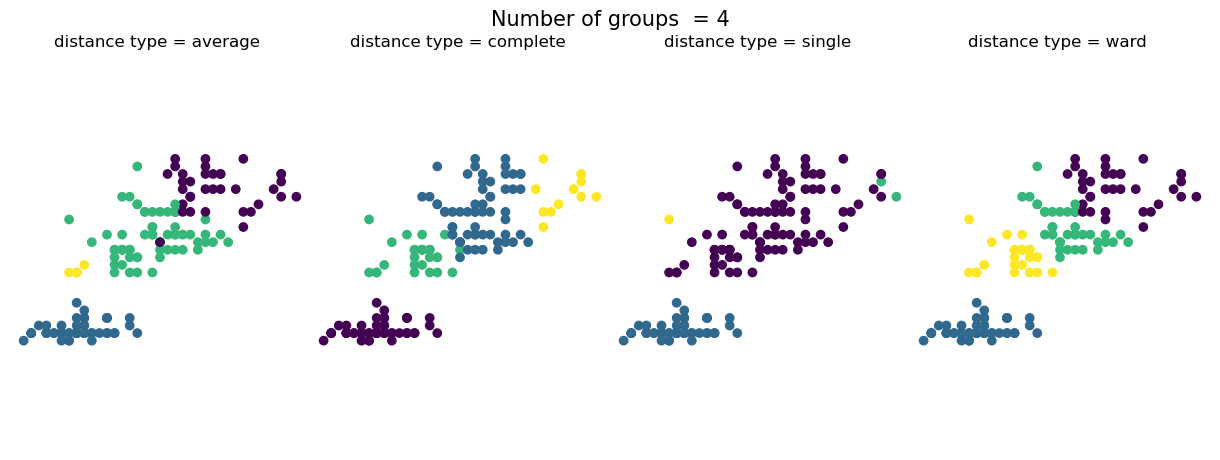

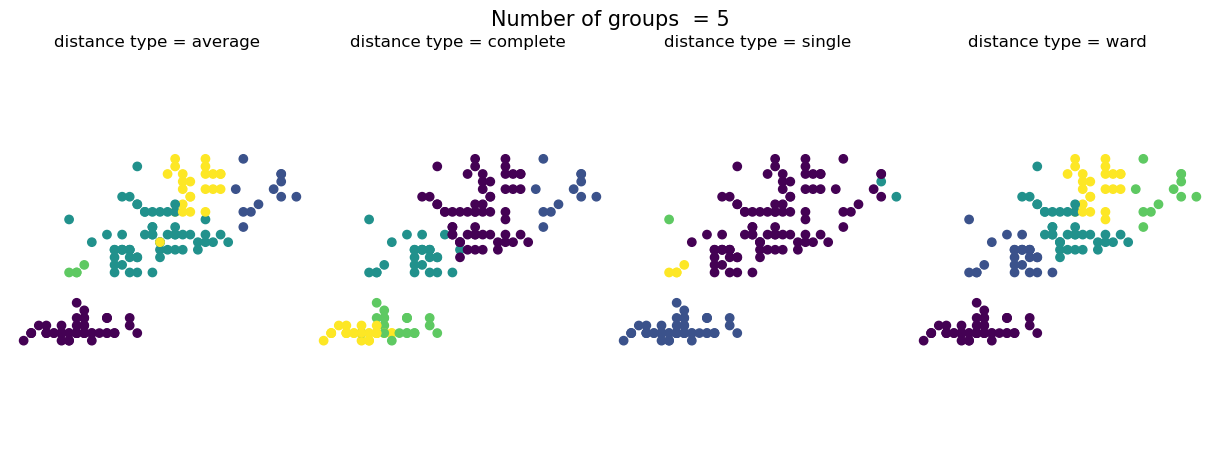

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from scipy.cluster.hierarchy import linkage, dendrogram, ward, fcluster
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# doinstalowałem pakiet poprzez Anaconde
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

data = pd.read_csv("iris.csv")

data = data.drop(columns=['Unnamed: 0','species'])



group_average = linkage(data, method = 'average', metric = 'euclidean')
group_ward = linkage(data, method = 'ward', metric = 'euclidean')
group_complete = linkage(data, method = 'complete', metric = 'euclidean')
group_single = linkage(data, method = 'single', metric = 'euclidean')
prog_proc = 30
prog_average = prog_proc*max(group_average[:,2])/100
prog_ward = prog_proc*max(group_ward[:,2])/100
prog_complete = prog_proc*max(group_complete[:,2])/100
prog_single = prog_proc*max(group_single[:,2])/100

plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.title("sepal_length / sepal_width");
plt.scatter(x = data['sepal_length'], y = data['sepal_width'])
plt.subplot(2,3,2)
plt.title("sepal_length / petal_length");
plt.scatter(x = data['sepal_length'], y = data['petal_length'])
plt.subplot(2,3,3)
plt.title("sepal_length / petal_width");
plt.scatter(x = data['sepal_length'], y = data['petal_width'])
plt.subplot(2,3,4)
plt.title("sepal_width / petal_length");
plt.scatter(x = data['sepal_width'], y = data['petal_length'])
plt.subplot(2,3,5)
plt.title("sepal_width / petal_width");
plt.scatter(x = data['sepal_width'], y = data['petal_width'])
plt.subplot(2,3,6)
plt.title("petal_length / petal_width");
plt.scatter(x = data['petal_length'], y = data['petal_width'])


plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.title("average");
cl = dendrogram(group_average, truncate_mode = 'lastp', color_threshold = prog_average )
plt.subplot(2,2,2)
plt.title("ward");
cl = dendrogram(group_ward, truncate_mode = 'lastp', color_threshold = prog_ward )
plt.subplot(2,2,3)
plt.title("complete");
cl = dendrogram(group_complete, truncate_mode = 'lastp', color_threshold = prog_complete )
plt.subplot(2,2,4)
plt.title("single");
cl = dendrogram(group_single, truncate_mode = 'lastp', color_threshold = prog_single )


for n_grup in (2,3,4,5):
    plt.figure(figsize=(12, 4.5))
    for index, distance_type in enumerate(('average', 'complete', 'single', 'ward')):
        plt.subplot(1, 4, index + 1)
        model = AgglomerativeClustering(linkage = distance_type, n_clusters = n_grup)
        model.fit(data)
        plt.scatter(data.sepal_length, data.petal_width, c = model.labels_)
        plt.title('distance type = %s ' % distance_type, fontdict=dict(verticalalignment = 'top'))
        plt.axis('equal')
        plt.axis('off')
        plt.subplots_adjust(bottom = 0, top = .89, wspace = 0, left = 0, right = 1)
        plt.suptitle('Number of groups  = %i' % n_grup, size = 15)

[ANG]

Conclusions from the analysis of the results of Task 1:
* The first graphs of the relationships between the different attributes helped me to select the key attributes to decide on the number of groups / type of distance. In my opinion, in the case of sepal_legnth / petal_width we could determine n groups quite easily. Therefore, I decided to use these attributes in the 3rd graph part - where the number of classes and the type of distance will finally be decided.
* In the second graph part I created dendrograms based on the different distance types. By far the most fitting option turns out to be the 'ward' option - groups are created based on the smallest variance when subgroups are combined. This graph shows that it would be most sensible to create 3 classes.
* Summarising the data from the 1st and 2nd parts of the graph, the 3rd part shows us the distribution of scores for different numbers of groups. Thus, the suspicion from the previous conclusions is confirmed - the optimal number of groups is 3 and the optimal distance type is 'ward'.

---

[POL]

Wnioski z analizy wyników zadania 1:
* Pierwsze wykresy zależności między poszczególnymi atrybutami pomogły mi wybrać atrybuty kluczowe do podjęcia decyzji o ilości grup / rodzaju odległości. W mojej opinii w przypadku sepal_legnth / petal_width w całkiem łatwy sposób moglibyśmy określić n grup. Dlatego zdecydowałem się wykorzystać te cechy w 3. części wykresowej - gdzie ostatecznie podjęta zostanie decyzja o ilości klas oraz typie odległości.
* W drugiej części wykresowej utworzyłem dendrogramy na podstawie różnych typów odległości. Zdecydowanie najbardziej pasującą opcją okazuje się być opcja 'ward' - grupy są tworzone na podstawie najmniejszej wariancji po połączeniu podgrup. Ten wykres pokazuje, że najrozsądniej byłoby stworzyć 3 klasy.
* Podsumowując dane z 1. oraz 2. części wykresowej, 3. część pokazuje nam rozkład punktów w przypadku różnej ilości grup. Tak więc potwierdza się podejrzenie z poprzednich wniosków - optymalna liczba grup to 3, a optymalny typ odległości to 'ward'.



[ANG]

Task 2 Perform clustering of the iris set data using the k-means method. Determine the optimal clustering parameters (number of groups, distance type). Determine with both methods (elbow and silhouette) what the optimal number of groups is.

---

[POL]

**Zadanie 2** Wykonaj grupowanie danych zbioru `iris` metodą k-średnich. Określ optymalne paramtery grupowania  (liczbę grup, typ odległości). Określ obiema metodami (łokciową i sylwetki) jakia jest dla optymalna liczba grup.

C:\Users\Wojciech\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Wojciech\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Wojciech\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Wojciech\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory le

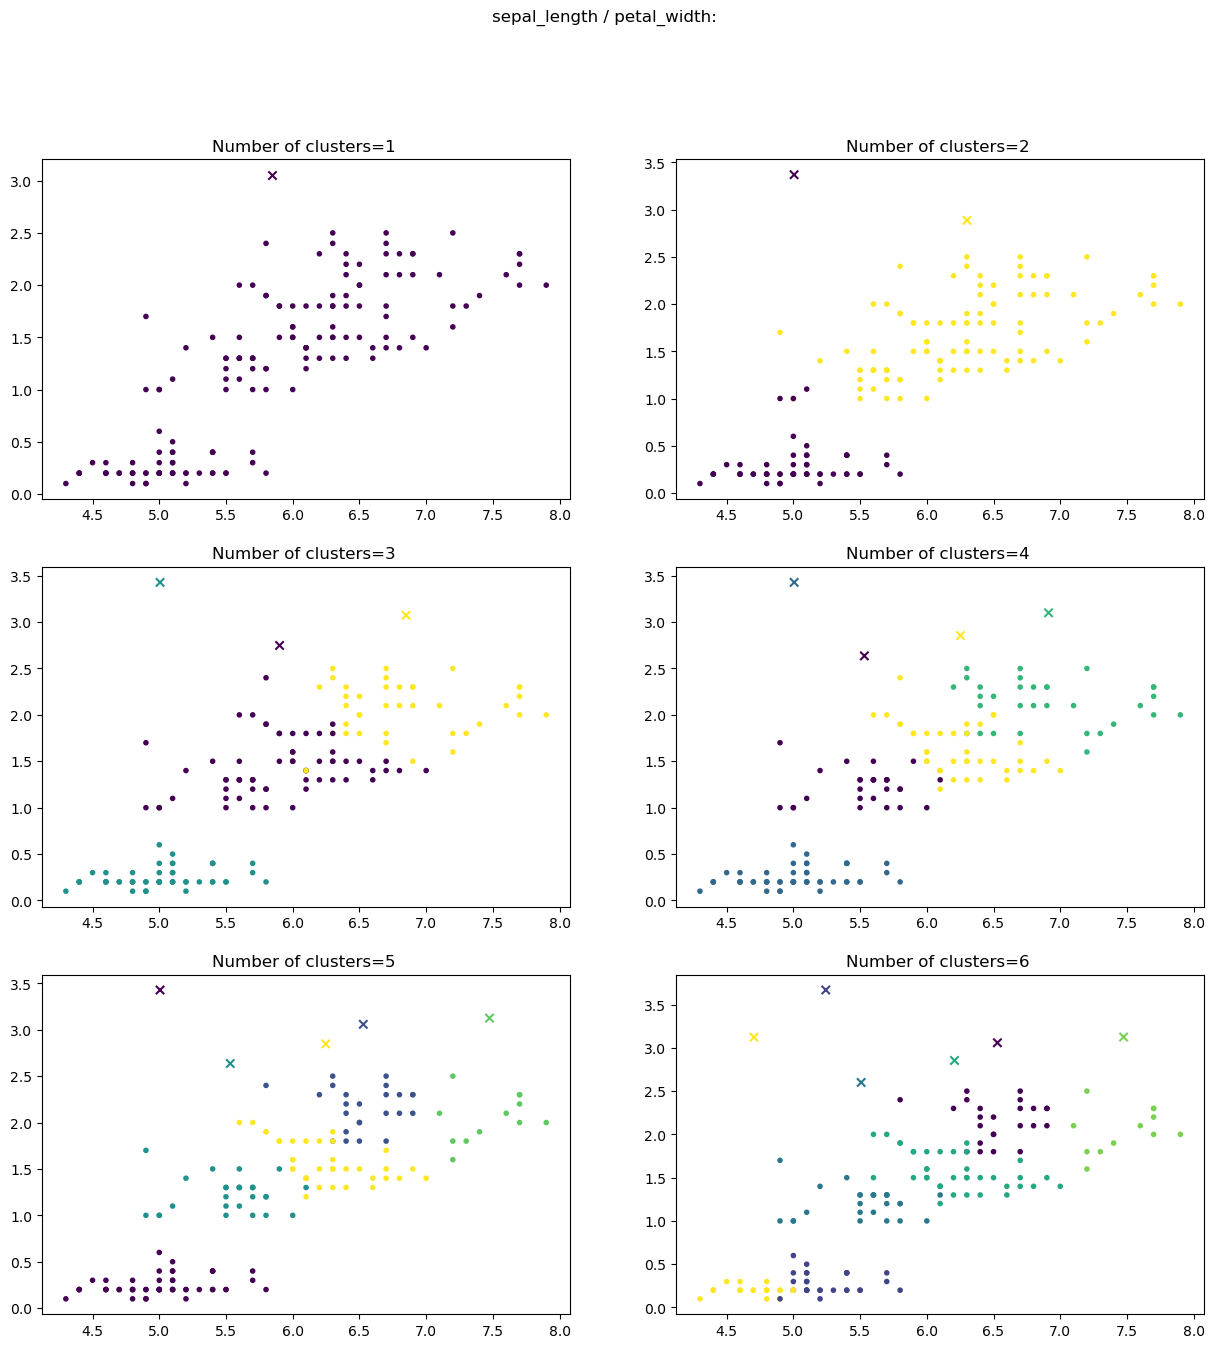

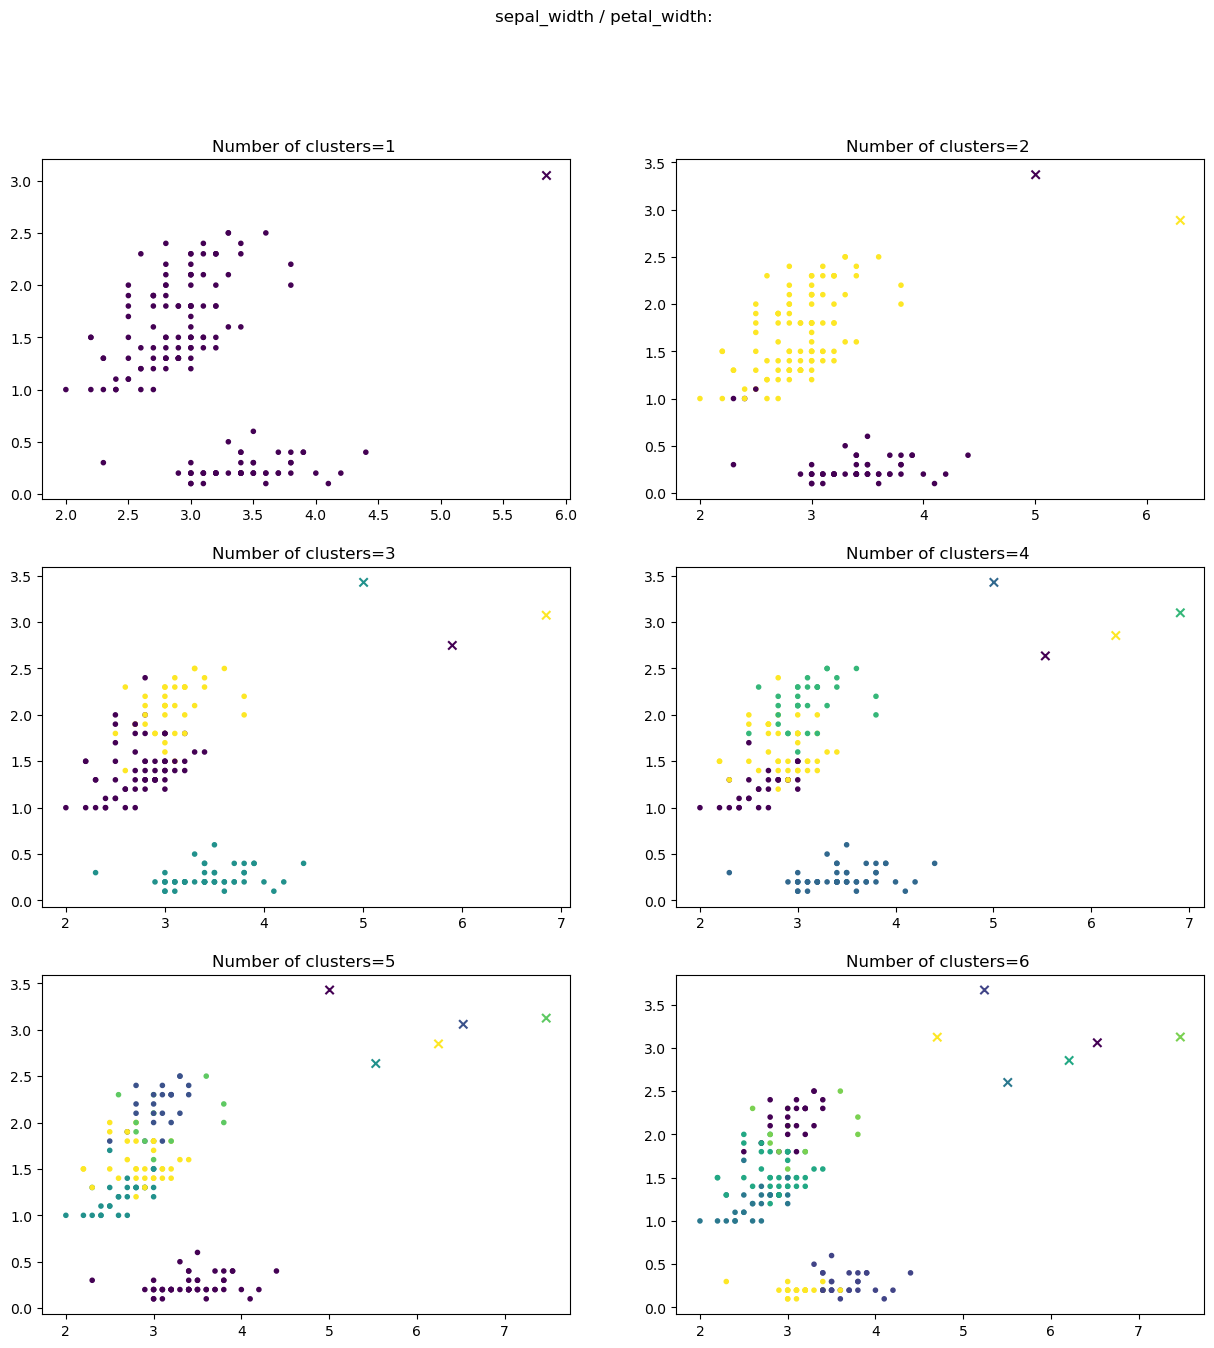

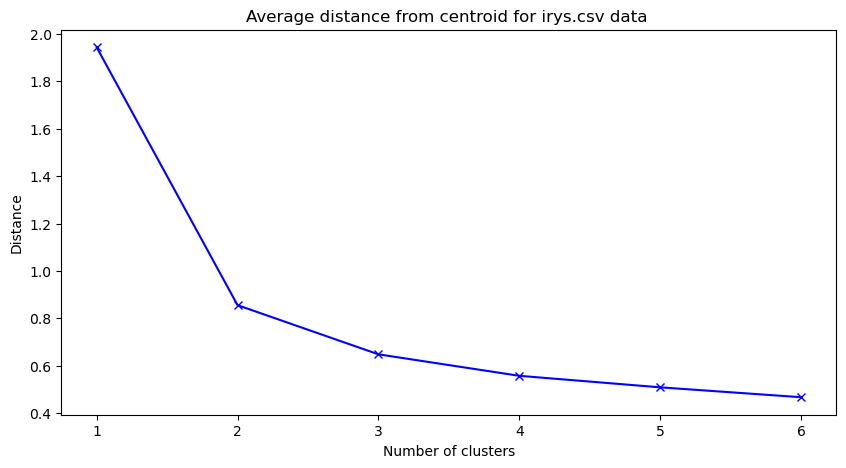

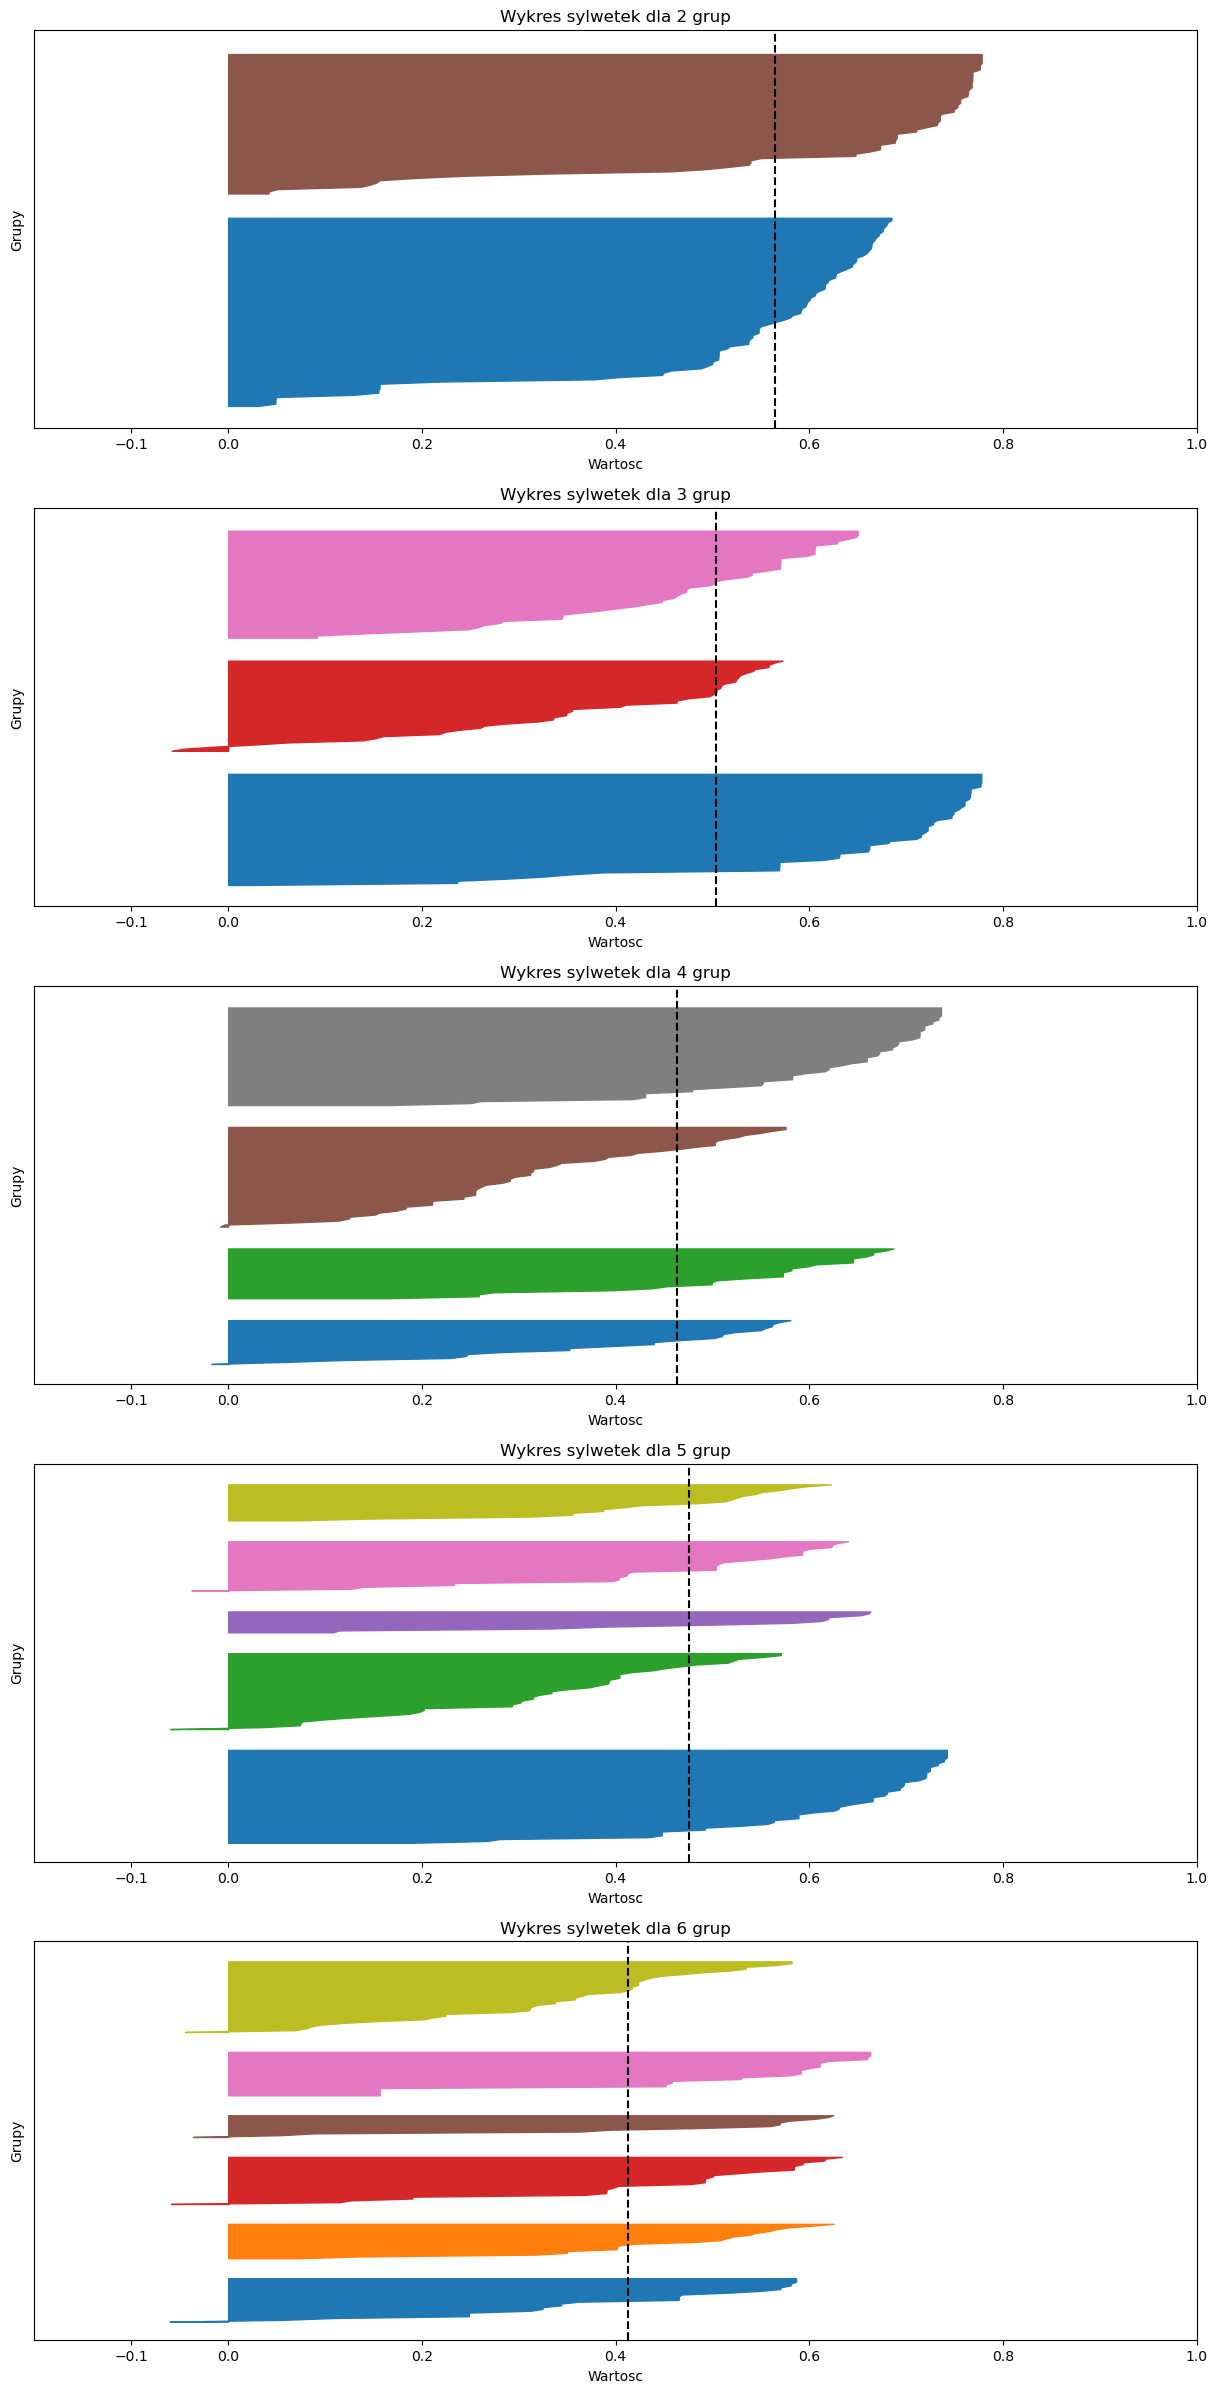

In [15]:
max_k = 6
size_k = range(1,max_k)
plt.figure(figsize=(15,15))

plt.suptitle("sepal_length / petal_width:")
average_distance_sepal_LENGTH_petal_width = []

position = 1
for k in range(1,max_k+1):
    plt.subplot(3,2,position)
    position = position + 1
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    craster_labels = kmeans.fit_predict(data)
    plt.scatter(data['sepal_length'], data['petal_width'], marker='.', c=craster_labels)
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:,0], centroids[:,1], marker='x', c=np.array(range(k)))
    plt.title('Number of clusters=%s ' % k)
    average_distance_sepal_LENGTH_petal_width.append(sum(np.min(cdist(data, centroids, 'euclidean'), axis=1)) / data.shape[0]) 

position=1
plt.figure(figsize=(15,15))

plt.suptitle('sepal_width / petal_width:')
average_distance_sepal_WIDTH_petal_width = []
for k in range(1,max_k+1):
    plt.subplot(3,2,position)
    position = position + 1
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    craster_labels = kmeans.fit_predict(data)
    plt.scatter(data['sepal_width'], data['petal_width'], marker='.', c=craster_labels)
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:,0], centroids[:,1], marker='x', c=np.array(range(k)))
    plt.title('Number of clusters=%s ' % k)
    average_distance_sepal_WIDTH_petal_width.append(sum(np.min(cdist(data, centroids, 'euclidean'), axis=1)) / data.shape[0]) 
     

plt.figure(figsize=(10,5))
plt.plot(range(1,max_k+1), srednia_odl1, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distance')
plt.title('Average distance from centroid for irys.csv data ')


liczby_grup = [2, 3, 4, 5, 6]
miara_jakosci = pd.Series()

#data=pd.DataFrame(dane)

plt.figure(figsize=(15,30))

for ile_grup in liczby_grup :

    ax1=plt.subplot(5,1,ile_grup-1)
    #figure.set_size_inches(15, 5)

    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(data) + (ile_grup + 1) * 10]) 
    
    kmeans = KMeans(n_clusters = ile_grup, random_state = 0).fit(data.values.reshape(-1,1))
    miara_jakosci = miara_jakosci.append(pd.Series(kmeans.inertia_))
    etykiety_grup = kmeans.fit_predict(data[['sepal_length','petal_width']])
 

    sylwetka = silhouette_samples(data[['sepal_length','petal_width']], etykiety_grup)   

    srednia_sylwetka = silhouette_score(data[['sepal_length','petal_width']], etykiety_grup)
    
    pozycja_kreski = 10
    for i in range(ile_grup):

        sylwetka_w_grupie = sylwetka[etykiety_grup == i]
        sylwetka_w_grupie.sort()

        liczebnosc_grupy = sylwetka_w_grupie.shape[0]
        kolor = cm.tab10(float(i) / ile_grup)
        ax1.fill_betweenx(np.arange(pozycja_kreski, pozycja_kreski + liczebnosc_grupy), 0, sylwetka_w_grupie ,color = kolor)

        pozycja_kreski += liczebnosc_grupy + 10
    
    ax1.set_title("Wykres sylwetek dla "+str(ile_grup)+" grup")
    ax1.set_xlabel("Wartosc")
    ax1.set_ylabel("Grupy")

    ax1.axvline(x = srednia_sylwetka, color = "black", linestyle = "--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])




[ANG]

Conclusions from the analysis of the results of task. 2:
* When using the k-means method, I took into account the additional relationship sepal_width / petal_width. I wanted to see what kind of dot plots would emerge and to compare their reasonableness with the dependency of the second features - already selected in the first exercise. The point assignment is similar to that of the agglomerative method.
* Using the elbow method, we are able to see that the largest slope ends at x=2. That is, 2 clusters should be the most appropriate - there is a lot of truth in this. Two clusters we are able to see immediately. However, the thesis of defining 3 groups also seems not too bad.
* I have created 5 silhouette charts for 2,3,4,5 and 6 groups. Interestingly, each of these graphs tells us that this number of groups would make sense! It is worth mentioning that this visualisation was created using the sepal_length / petal_width parameters - when we look at the dot plots of this characteristic the groups created in this way actually make sense. 
* As we are able to find class information in the iris.csv data, we know that there are 3 groups to which a flower can be assigned. This is a reasonable division, but two of these three classes will be much more difficult to distinguish between.

----

[POL]

Wnioski z analizy wyników zad. 2:
* Przy wykorzystaniu metody k-średnich wziąłem pod uwagę dodatkową zależność sepal_width / petal_width. Chciałem zobaczyć, jakie powstaną wykresy punktowe oraz porównać ich rozsądność z zależnością cech drugich — wybranych już w pierwszym ćwiczeniu. Przypisanie punktów jest podobne do tego z metody aglomeracyjnej.
* Wykorzystując metodę kolankową, jesteśmy w stanie zauważyć, że największy spadek kończy się na x=2. To znaczy, że 2 grupy powinny być najbardziej odpowiednie - jest w tym dużo prawdy. Dwa skupiska jesteśmy w stanie dostrzec od razu. Jednak teza o określeniu 3 grup też wydaje się nie najgorsza.
* Stworzyłem 5 wykresów sylwetkowych dla 2,3,4,5 oraz 6 grup. Co ciekawe każdy z tych wykresów mówi nam, że taka liczba grup miałaby sens! Warto wspomnieć, że ta wizualizacja została stworzona przy pomocy parametrów sepal_length / petal_width - gdy spojrzymy na wykresy punktowe tej charakterystyki to faktycznie utworzone w ten sposób grupy mają sens. 
* Jako iż w danych irys.csv jesteśmy w stanie znaleźć informację o klasach, wiemy, że istnieją 3 grupy, do których można przypisać dany kwiat. Jest to rozsądny podział, jednak dwie z tych trzech klas będą dużo trudniejsze do rozróżnienia między sobą.
